# Model

In [1]:
import matplotlib.pyplot as plt
from math import *
import random

# Math

## Class


### Class: Vector


In [ ]:
class Vector():
    def __init__(self, coordinate):
        self.coordinate = tuple(coordinate)
        self.dimensions = len(self.coordinate)
    def __str__(self):
        return "Vector" + "({:.5f}".format(self.coordinate[0]) + ", {:.5f})".format(self.coordinate[1])
    def __repr__(self) -> str:
        return self.__str__()
    def __add__(self, vector):
        return Vector((self.coordinate[i] + vector.coordinate[i] for i in range(self.dimensions)))
    def __mul__(self, scalar):
        return Vector((self.coordinate[i] * scalar for i in range(self.dimensions)))
    def __sub__(self, vector):
        return self + (vector * -1)
    def __truediv__(self, scalar):
        return self * (1 / scalar)
    def norm(self):
        return (sum(map(lambda x: x**2, self.coordinate))) ** 0.5

### Class: DataPoint

In [ ]:
class DataPoint():
    def __init__(self, data_points, copy = True):
        self.point_set = data_points
        self.arc_length_set = [0] + [(self.point_set[i] - self.point_set[i+1]).norm() for i in range(len(self.point_set) - 1)]
        self.arc_length_set = [sum(self.arc_length_set[:i+1])for i in range(len(self.arc_length_set))]
        self.arc_length = self.arc_length_set[-1]
        self.x = [point.coordinate[0] for point in self.point_set]
        self.y = [point.coordinate[1] for point in self.point_set]
    def __getitem__(self, item):
        return self.point_set[item]
    def __len__(self):
        return self.point_set.__len__()
    def __str__(self):
        s = "DataPoint("
        for point in self.point_set:
            s += '\n'
            s += point.__str__()
        s += ')'
        return s
    def __repr__(self):
        return self.__str__()
    def plot(self):
        plt.plot(self.x, self.y)
    def scatter(self):
        plt.scatter(self.x, self.y)
    def equal_partition(self, n):
        point_set = []
        standard = self.arc_length / (n)
        k = 1
        for i in range(n+1):
            if i == 0:
                point_set.append(self.point_set[0])
            elif i == n:
                point_set.append(self.point_set[-1])
            else:
                level = i * standard
                for j in range(k, len(self.arc_length_set)):
                    if self.arc_length_set[j] >= level:
                        t = (level - self.arc_length_set[j-1]) / (self.arc_length_set[j] - self.arc_length_set[j-1])
                        vector = self.point_set[j-1] + (self.point_set[j] - self.point_set[j-1]) * t
                        point_set.append(vector)
                        k = j-1
                        break
        return DataPoint(point_set)
    def unispeed(self):
        return self.equal_partition(self.__len__())

### Class: Bezier Curve

In [ ]:
class BezierCurve():
    def __init__(self, bezier_points):
        self.bezier_points = bezier_points
        self.order = len(bezier_points) - 1
    def __call__(self, t):
        D = list(self.bezier_points)
        for i in range(1, self.order+1):
            for j in range(0, self.order+1-i):
              D[j] = D[j]*(1-t) + D[j+1]*t
        return D[0]

## Function

### Function: parameter

In [ ]:
def parameter(a, b, n):
    return [a + (b - a) * i / (n - 1) for i in range(n)]

### Function: vector_valued_function

In [ ]:
def vector_valued_function(f1, f2):
    return lambda s: Vector([f1(s), f2(s)])

### Function: sample

In [ ]:
def sample(F, t):
    return DataPoint(list(map(F, t)))

### Function: initial_bezier_curve

In [ ]:
def initial_bezier_curve(data_point, order):
    bezier_points = data_point.equal_partition(order)
    return BezierCurve(bezier_points)

# Q-learning

### Class: Environment

In [ ]:
class Environment():
    def __init__(self, datapoint_given):
        self

### Class: Agent

In [ ]:
class Agent():
    def __init__(self, alpha, gamma, epsilon):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = ["upper", "lower", "left", "right", \
                        "upper_left", "upper_right", "lower_left", "lower_right"]
        self.states = ["x_right", "x_left", "y_upper", "y_lower", \
                       "I", "II", "III", "IV"]
        self.Q = {state: {action: 0 for action in self.actions} for state in self.states}
    def get_action(self, state):
        if random.random() < self.epsilon:
            method = "Exploration"
            action = random.choice(self.actions)
        else:
            method = "Exploitation"
            max_Q = max(self.Q[state].values())
            actions = self.Q[state].items()
            actions = list(filter(lambda item: item[1] == max_Q, actions))
            action = random.choice(actions)[0]
        return action
    def update(self, state, action, reward, next_state):
        next_max_Q = max(self.Q[next_state].values())
        alpha = self.alpha
        gamma = self.gamma
        self.Q[state][action] = (1 - alpha) * self.Q[state][action] \
                                + alpha * (reward + gamma * next_max_Q)

### Func: reward_function

# Test:

In [ ]:
x = Agent(0.5, 0.5, 0.3)
for i in range(10):
    print(x.get_action("I"))

upper_right
lower_right
left
upper
right
lower
upper_right
upper_left
upper
upper_left


# Main:

Vector(1.00000, 0.00000)


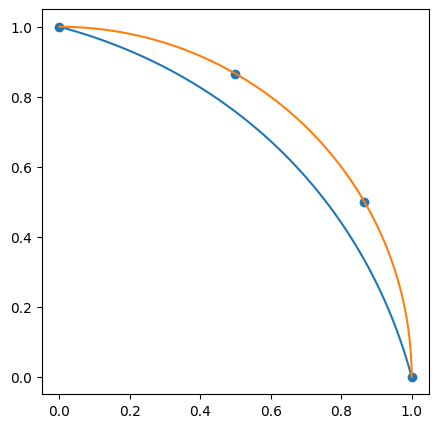

In [ ]:
plt.figure(figsize = (5, 5))

f1 = cos
f2 = sin
F = vector_valued_function(f1, f2)

n = 100
a = 0
b = pi/2
t = parameter(a, b, n)

datapoint_given = sample(F, t)
print(datapoint_given[0])

B = initial_bezier_curve(datapoint_given, 3)
n = 100
a = 0
b = 1
t = parameter(a, b, n)
datapoint_bezier = sample(B, t)

datapoint_bezier.plot()
B.bezier_points.scatter()
datapoint_given.plot()